# Reading and Understanding the Data

In [2]:
## Import library
import numpy  as np
import pandas as pd

## Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
## Import data
file_path = r"D:\STUDY\Data Tech CE\Project\Data Set\Real_estate.csv"
housing = pd.read_csv(file_path)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [21]:
## Missing data
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   price            545 non-null    int64
 1   area             545 non-null    int64
 2   bedrooms         545 non-null    int64
 3   bathrooms        545 non-null    int64
 4   stories          545 non-null    int64
 5   mainroad         545 non-null    int64
 6   guestroom        545 non-null    int64
 7   basement         545 non-null    int64
 8   hotwaterheating  545 non-null    int64
 9   airconditioning  545 non-null    int64
 10  parking          545 non-null    int64
 11  prefarea         545 non-null    int64
 12  furnished        545 non-null    int32
 13  semi-furnished   545 non-null    int32
dtypes: int32(2), int64(12)
memory usage: 55.5 KB


# Data Preparetion

In [10]:
## List of variables
vars = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea"]

## Defining the binary_m function
def binary_m(x):
    return x.map({"yes": 1, "no": 0})

## Applying the function to housing list
housing[vars] = housing[vars].apply(binary_m)

In [12]:
## The new housing DataFrame
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [14]:
## Dummy variables
status = pd.get_dummies(housing["furnishingstatus"], dtype = int)
status.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


In [16]:
## Add the results to the original housing dataframe
housing = pd.concat([housing, status], axis = 1)

In [18]:
## Drop furnishingstatus and unfurnished
housing.drop(["furnishingstatus", "unfurnished"], axis = 1, inplace = True)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0


# Splitting the Data into Training and Testing Sets

In [29]:
## Split the data to be train and test data
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(housing, test_size = 0.3, random_state = 42)

In [31]:
## Use MinMax scaling
from sklearn.preprocessing import MinMaxScaler

In [33]:
## Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ["area", "bedrooms", "bathrooms", "stories", "parking", "price"]
scaler = MinMaxScaler()
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished
126,0.393333,0.378694,0.4,0.0,0.0,1,0,1,0,0,0.666667,1,0,0
363,0.186667,0.132921,0.2,0.0,0.0,1,0,0,1,0,0.000000,0,0,1
370,0.180000,0.180756,0.2,0.0,0.0,1,0,0,0,1,0.666667,0,0,1
31,0.633333,0.367698,0.4,0.0,1.0,1,0,0,0,1,0.666667,0,0,1
113,0.412667,0.547766,0.4,0.0,0.0,1,0,1,0,0,0.666667,1,1,0


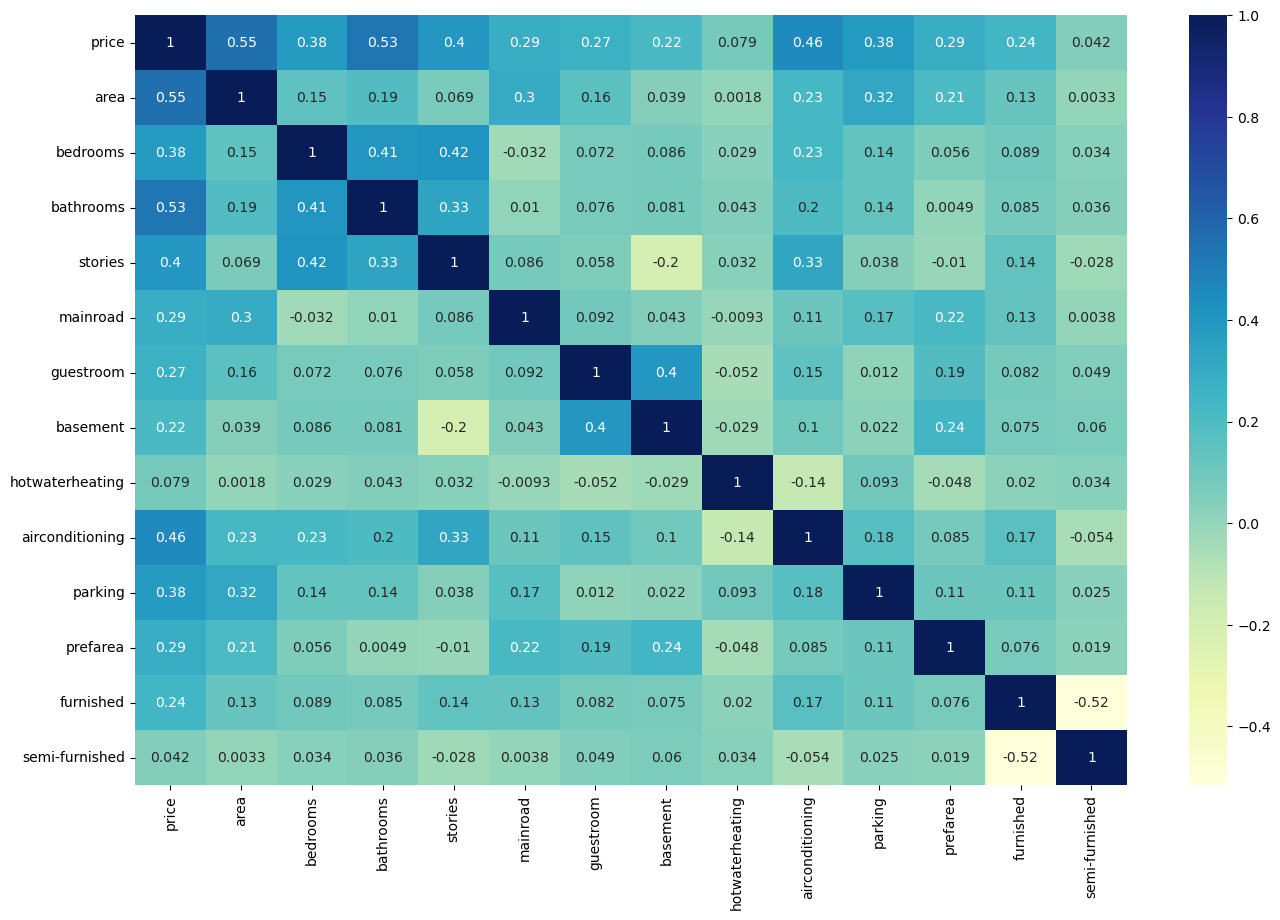

In [35]:
## The correlation coefficients
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap = 'YlGnBu')
plt.show()

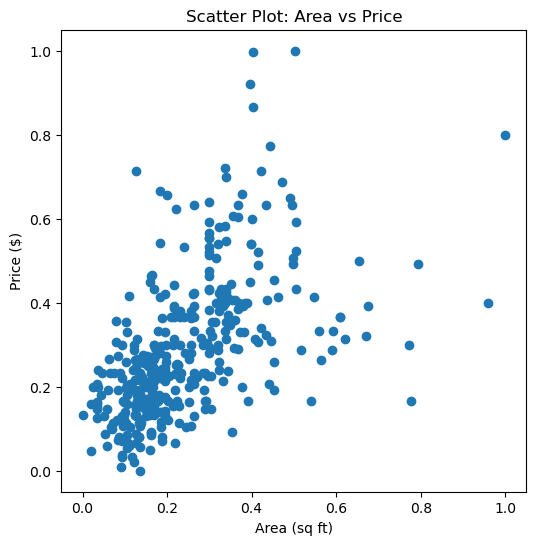

In [37]:
## Pairplot for area vs price
plt.figure(figsize = [6, 6])
plt.scatter(df_train.area, df_train.price)
plt.xlabel("Area (sq ft)")
plt.ylabel("Price ($)")
plt.title("Scatter Plot: Area vs Price")
plt.show()

# Building a linear model

In [40]:
## Dividing into X and Y sets for the model building
y_train = df_train.pop("price")
x_train = df_train

In [42]:
## Adding all the variables to the model

In [44]:
## Build a linear model
import statsmodels.api as sm

x_train_lm = sm.add_constant(x_train) 
lr_1 = sm.OLS(y_train, x_train_lm).fit()

print(lr_1.params)

const             -0.001388
area               0.350984
bedrooms           0.038521
bathrooms          0.318500
stories            0.119219
mainroad           0.038864
guestroom          0.026258
basement           0.045962
hotwaterheating    0.058702
airconditioning    0.065318
parking            0.086603
prefarea           0.048494
furnished          0.037256
semi-furnished     0.025670
dtype: float64


In [46]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     63.79
Date:                Mon, 17 Mar 2025   Prob (F-statistic):           1.00e-85
Time:                        03:22:07   Log-Likelihood:                 362.28
No. Observations:                 381   AIC:                            -696.6
Df Residuals:                     367   BIC:                            -641.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0014      0.020     

In [ ]:
## Check for the VIF values of the feature variables.

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [50]:
## Create a dataframe that will contain the names of all the feature variables
## Calculate the VIFs : 1
vif = pd.DataFrame()
vif["Features"] = x_train.columns
vif["VIF"] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

           Features   VIF
1          bedrooms  6.90
4          mainroad  5.91
0              area  4.60
3           stories  2.86
12   semi-furnished  2.36
6          basement  2.20
11        furnished  2.00
9           parking  1.94
8   airconditioning  1.88
2         bathrooms  1.66
5         guestroom  1.56
10         prefarea  1.50
7   hotwaterheating  1.11


In [52]:
## Generally want a VIF that is less than 5.
## bedroom has a significantly high VIF (6.9) and a high p-value (0.319)
## Dropping the variable and updating the model
x = x_train.drop("bedrooms", axis = 1)
x_train_lm = sm.add_constant(x)
lr_2 = sm.OLS(y_train, x_train_lm).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     69.02
Date:                Mon, 17 Mar 2025   Prob (F-statistic):           1.93e-86
Time:                        03:23:30   Log-Likelihood:                 361.76
No. Observations:                 381   AIC:                            -697.5
Df Residuals:                     368   BIC:                            -646.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0107      0.016     

In [54]:
# Calculate the VIFs again for the new model : 2
vif = pd.DataFrame()
vif["Features"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

           Features   VIF
3          mainroad  5.26
0              area  4.38
2           stories  2.42
11   semi-furnished  2.24
5          basement  2.05
10        furnished  1.97
8           parking  1.93
7   airconditioning  1.88
1         bathrooms  1.59
4         guestroom  1.55
9          prefarea  1.50
6   hotwaterheating  1.10


In [56]:
## mainroad has a significantly high VIF (5.26) and a high p-value (0.016)
## Dropping the variable and updating the model
x = x.drop("mainroad", axis = 1)
x_train_lm = sm.add_constant(x)
lr_3 = sm.OLS(y_train, x_train_lm).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     73.80
Date:                Mon, 17 Mar 2025   Prob (F-statistic):           3.78e-86
Time:                        03:24:04   Log-Likelihood:                 358.77
No. Observations:                 381   AIC:                            -693.5
Df Residuals:                     369   BIC:                            -646.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0341      0.012     

In [58]:
# Calculate the VIFs again for the new model : 3
vif = pd.DataFrame()
vif["Features"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

           Features   VIF
0              area  3.32
2           stories  2.24
10   semi-furnished  2.00
4          basement  1.98
7           parking  1.91
6   airconditioning  1.88
9         furnished  1.84
1         bathrooms  1.57
3         guestroom  1.55
8          prefarea  1.48
5   hotwaterheating  1.10


In [60]:
## guestroom and semi-furnished has a significantly high p-value
## Dropping the variable and updating the model
x = x.drop("guestroom", axis = 1)
x_train_lm = sm.add_constant(x)
lr_4 = sm.OLS(y_train, x_train_lm).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     80.34
Date:                Mon, 17 Mar 2025   Prob (F-statistic):           2.14e-86
Time:                        03:25:01   Log-Likelihood:                 357.05
No. Observations:                 381   AIC:                            -692.1
Df Residuals:                     370   BIC:                            -648.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0319      0.012     

In [62]:
# Calculate the VIFs again for the new model : 4
vif = pd.DataFrame()
vif["Features"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

          Features   VIF
0             area  3.28
2          stories  2.22
9   semi-furnished  2.00
6          parking  1.90
5  airconditioning  1.87
8        furnished  1.84
3         basement  1.71
1        bathrooms  1.57
7         prefarea  1.47
4  hotwaterheating  1.10


# Residual Analysis of the train data

In [65]:
## Residual Analysis of the train data
y_train_price = lr_4.predict(x_train_lm)

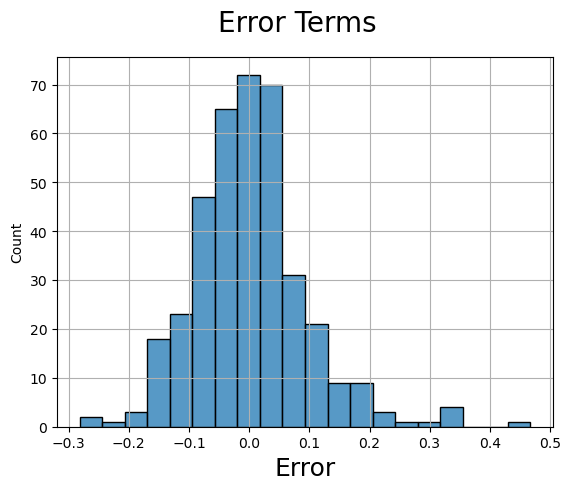

In [67]:
## Plot the histogram of the error terms
fig = plt.figure()
plt.grid()
sns.histplot((y_train - y_train_price), bins = 20)
fig.suptitle("Error Terms", fontsize = 20)
plt.xlabel("Error", fontsize = 18)
plt.show()

# Making Predictions Using the Final Model

In [70]:
## Applying the scaling on the test sets
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [72]:
## Dividing into x_test and y_test
y_test = df_test.pop("price")
x_test = df_test

In [74]:
## Adding constant variable to test dataframe
x_test_m4 = sm.add_constant(x_test)

In [76]:
## Creating x_test_m4 dataframe by dropping variables from X_test_ml
x_test_m4 = x_test_m4.drop(["bedrooms", "mainroad", "guestroom"], axis = 1)

In [78]:
## Making predictions using the fourth model
y_pred_m4 = lr_4.predict(x_test_m4)

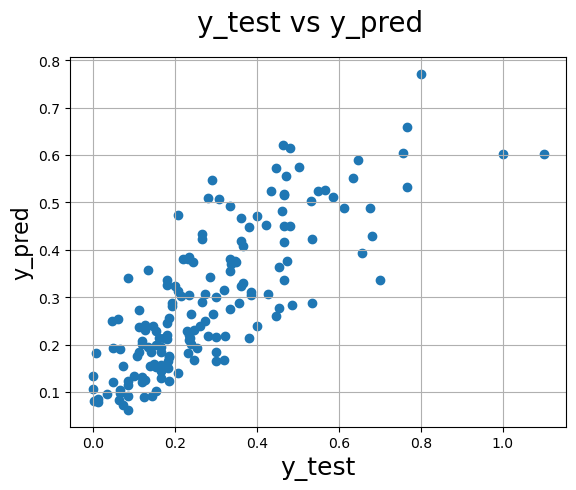

In [80]:
## Plot y_test and y_pred

fig = plt.figure()
plt.grid()
plt.scatter(y_test, y_pred_m4)
fig.suptitle("y_test vs y_pred", fontsize = 20)
plt.xlabel("y_test", fontsize = 18)
plt.ylabel("y_pred", fontsize = 16)
plt.show()

In [82]:
## R-squared
from sklearn.metrics import r2_score
r2_score_lr_train = 0.680
print("R-squared Train: ", r2_score_lr_train)

R-squared Train:  0.68


In [84]:
r2_score_lr_test = round(r2_score(y_test, y_pred_m4),3)
print("R-squared Test: ", r2_score_lr_test)

R-squared Test:  0.636


In [86]:
lr_4.params.sort_values(ascending = False)

area               0.382978
bathrooms          0.318962
stories            0.134465
parking            0.089334
airconditioning    0.066524
hotwaterheating    0.056669
basement           0.056098
prefarea           0.055083
furnished          0.041636
const              0.031922
semi-furnished     0.028774
dtype: float64

In [88]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = round(mean_squared_error(y_test, y_pred_m4), 3)
mae = round(mean_absolute_error(y_test, y_pred_m4), 3)
print("MSE: ", mse)
print("MAE: ", mae)

MSE:  0.014
MAE:  0.089


# Conclusion

1. R-squared อยู่ในระดับปานกลาง 60-70% และเนื่องจาก R-squared Test มีค่าน้อยกว่า R-squared Train โมเดลอาจมีปัญหา Overfitting เล็กน้อย
   
2. ค่า MSE และ MAE มีค่าคค่อนข้างต่ำ โมเดลทำนายผลได้ค่อนข้างแม่นยำ และผิดพลาดไปเล็กน้อย

หากอยากอ่านบทความเพิ่มเติม
Link : 